In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic('matplotlib inline')
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

In [2]:
xl = pd.ExcelFile("HainanClean.xlsx")

In [3]:
df = xl.parse("fulldf")
df.shape

(1398, 36)

In [5]:
df.drop(['Day', 'Year', 'Water/m3', 'Office space electricity use/kWh', '50% NaOH/kg', 'FeCl2/kg', 'PAM/kg', 'Defoamer/kg'], axis = 1, inplace = True)

In [6]:
df.describe()

,Month #,Day #,Raw Biogas Produced (m3),BioCNG Produced (m3),BioCNG Sold (m3),Vehicle use (m3),Liquid Fertilizer Produced (t),Solid fertilizer produced (t),Wastewater flow to WWTP (unit?),Solid residues (kg),...,Chicken litter (t),Bagasse feed (t),Alcohol waste (t),Chinese medicine waste (t),Energy grass (t),Banana fruit shafts (t),Lemon waste (t),Percolate (t),Other waste (t),Diesel/L
count,1398.000000,1398.00000,1398.000000,1398.000000,1398.000000,149.000000,1395.000000,1398.000000,363.000000,422.000000,...,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1394.000000,1394.000000,1398.000000,1398.000000
mean,23.434192,699.50000,8649.632937,5422.512496,5489.456767,473.874765,41.034323,9.759385,149.815427,10028.717536,...,6.592089,12.321190,0.656552,0.209077,0.066638,0.479399,0.361836,80.377834,2.606810,74.730229
std,13.253906,403.71215,6845.878615,3843.798014,4176.023996,123.996377,54.880521,25.323745,86.956276,9962.483719,...,13.708726,14.596073,3.469830,1.078992,1.251723,3.621379,1.520368,137.634395,10.045152,126.112344
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,350.25000,3118.750000,2409.500000,3515.250000,429.680000,0.000000,0.000000,86.000000,4010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,699.50000,7088.500000,4014.500000,4230.000000,489.000000,0.000000,0.000000,157.000000,7530.000000,...,0.000000,6.775000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1048.75000,14660.750000,8682.750000,8318.750000,552.000000,73.780000,5.020000,198.000000,14785.000000,...,0.000000,20.250000,0.000000,0.000000,0.000000,0.000000,0.000000,159.500000,0.000000,110.000000
max,46.000000,1398.00000,24068.000000,15100.000000,19529.000000,723.000000,285.420000,315.760000,438.000000,109820.000000,...,78.540000,85.050000,35.860000,11.260000,39.220000,60.000000,14.400000,541.000000,110.020000,1107.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 28 columns):
Month                              1398 non-null object
Month #                            1398 non-null int64
Day #                              1398 non-null int64
Raw Biogas Produced (m3)           1398 non-null float64
BioCNG Produced (m3)               1398 non-null float64
BioCNG Sold (m3)                   1398 non-null float64
Vehicle use (m3)                   149 non-null float64
Liquid Fertilizer Produced (t)     1395 non-null float64
Solid fertilizer produced (t)      1398 non-null float64
Wastewater flow to WWTP (unit?)    363 non-null float64
Solid residues (kg)                422 non-null float64
Pig Manure (t)                     1398 non-null float64
Cassava (t)                        1398 non-null float64
Fish waste water (t)               1398 non-null float64
Kitchen food waste (t)             1398 non-null float64
Municipal fecal residue (t)        1398 non-nu

In [8]:
#number of zeros
df.astype(bool).sum(axis=0)

Month                              1398
Month #                            1398
Day #                              1398
Raw Biogas Produced (m3)           1160
BioCNG Produced (m3)               1358
BioCNG Sold (m3)                   1160
Vehicle use (m3)                   1395
Liquid Fertilizer Produced (t)      691
Solid fertilizer produced (t)       415
Wastewater flow to WWTP (unit?)    1378
Solid residues (kg)                1351
Pig Manure (t)                     1198
Cassava (t)                         253
Fish waste water (t)                261
Kitchen food waste (t)              503
Municipal fecal residue (t)         437
Tea waste (t)                       151
Chicken litter (t)                  334
Bagasse feed (t)                    895
Alcohol waste (t)                    62
Chinese medicine waste (t)           55
Energy grass (t)                     16
Banana fruit shafts (t)              40
Lemon waste (t)                      83
Percolate (t)                       425


In [9]:
Month_CNG = df[['Month', 'BioCNG Produced (m3)']].groupby(['Month']).mean()
Month_CNG

,BioCNG Produced (m3)
Month,
April,5440.311111
August,4822.645161
December,6552.032258
February,6617.648649
January,8227.403226
July,5469.145161
June,4689.644068
June,3535.500000
March,6624.516129


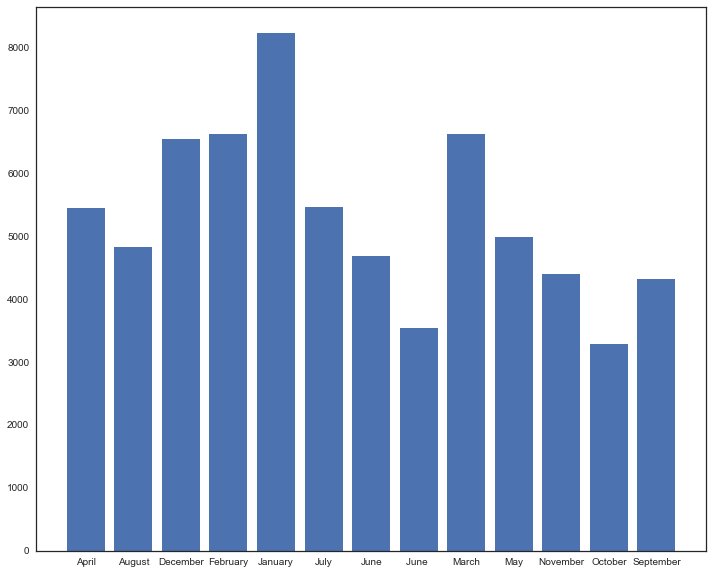

In [10]:
LABELS = Month_CNG.index
Month = list(range(13))
CNG_month = Month_CNG['BioCNG Produced (m3)']
a = []
for i in CNG_month:
    a.append(i)


plt.figure(figsize = (12,10))
plt.bar(Month, a, align='center')
plt.xticks(Month, LABELS)
plt.plot(df['BioCNG Produced (m3)'].describe().mean())

In [11]:
Fish_CNG = df[['Fish waste water (t)', 'BioCNG Produced (m3)']].groupby(['Fish waste water (t)']).mean()
Fish_CNG.head()

,BioCNG Produced (m3)
Fish waste water (t),
0.00,5501.56066
2.00,3947.00000
2.34,3125.00000
2.66,3847.00000
2.88,1841.50000


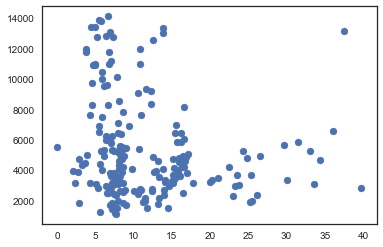

In [12]:
#plt.scatter(df['Fish waste input (t)'], df['BioCNG Sold (m3)'])
Fish_CNG2 = Fish_CNG['BioCNG Produced (m3)']
b = []
for i in Fish_CNG2:
    b.append(i)
#print(b)
plt.scatter(Fish_CNG.index, b)

Text(0,0.5,'BioCNG Produced (m3)')

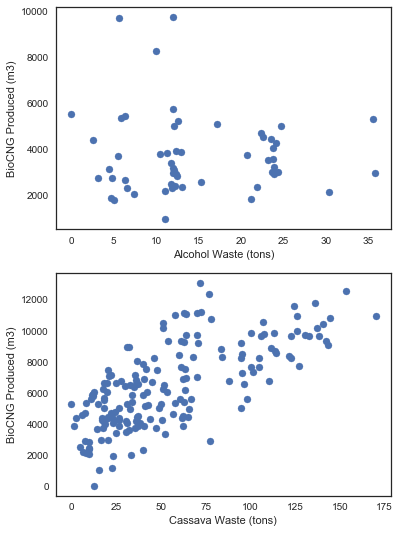

In [24]:
df = df.replace(' ',0)
Alcowaste_CNG = df[['Alcohol waste (t)', 'BioCNG Produced (m3)']].groupby(['Alcohol waste (t)']).mean()
Alcowaste_CNG.head()

Alcowaste_CNG2 = Alcowaste_CNG['BioCNG Produced (m3)']
d = []
for i in Alcowaste_CNG2:
    d.append(i)
#print(c)
plt.subplot(2,1,1)
plt.scatter(Alcowaste_CNG.index, d)
plt.xlabel('Alcohol Waste (tons)')
plt.ylabel('BioCNG Produced (m3)')

Cassava_CNG = df[['Cassava (t)', 'BioCNG Produced (m3)']].groupby(['Cassava (t)']).mean()
Cassava_CNG.head()

Cassava_CNG2 = Cassava_CNG['BioCNG Produced (m3)']

#all_plot = list(Tea_CNG2, Cassava_CNG2)

plt.rcParams['figure.figsize'] = (10, 10)

        
plt.subplot(2,1,2)
e = []
for i in Cassava_CNG2:
    e.append(i)
plt.scatter(Cassava_CNG.index, e)
plt.xlabel('Cassava Waste (tons)')
plt.ylabel('BioCNG Produced (m3)')


In [40]:
plt.rcParams['figure.figsize'] = (6, 4)

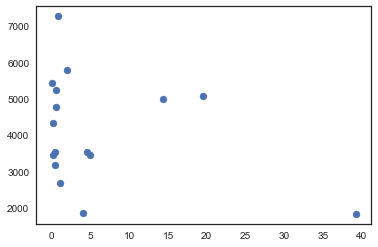

In [41]:
Grass_CNG = df[['Energy grass (t)', 'BioCNG Produced (m3)']].groupby(['Energy grass (t)']).mean()
Grass_CNG.head()

Grass_CNG2 = Grass_CNG['BioCNG Produced (m3)']
d = []
for i in Grass_CNG2:
    d.append(i)
#print(c)
plt.scatter(Grass_CNG.index, d)

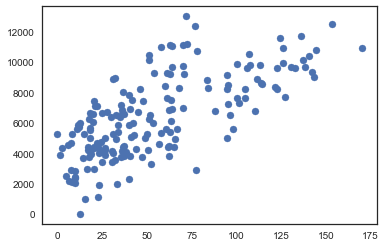

In [42]:
Cassava_CNG = df[['Cassava (t)', 'BioCNG Produced (m3)']].groupby(['Cassava (t)']).mean()
Cassava_CNG.head()

Cassava_CNG2 = Cassava_CNG['BioCNG Produced (m3)']
d = []
for i in Cassava_CNG2:
    d.append(i)
#print(c)
plt.scatter(Cassava_CNG.index, d)

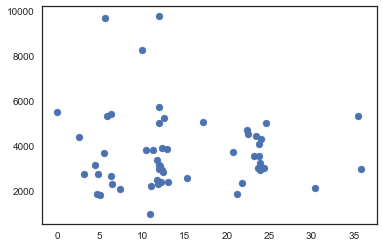

In [43]:
Alcowaste_CNG = df[['Alcohol waste (t)', 'BioCNG Produced (m3)']].groupby(['Alcohol waste (t)']).mean()
Alcowaste_CNG.head()

Alcowaste_CNG2 = Alcowaste_CNG['BioCNG Produced (m3)']
d = []
for i in Alcowaste_CNG2:
    d.append(i)
#print(c)
plt.scatter(Alcowaste_CNG.index, d)

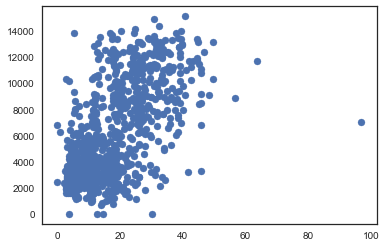

In [44]:
Manure_CNG = df[['Pig Manure (t)', 'BioCNG Produced (m3)']].groupby(['Pig Manure (t)']).mean()
Manure_CNG.head()

Manure_CNG2 = Manure_CNG['BioCNG Produced (m3)']
d = []
for i in Manure_CNG2:
    d.append(i)
#print(c)
plt.scatter(Manure_CNG.index, d)

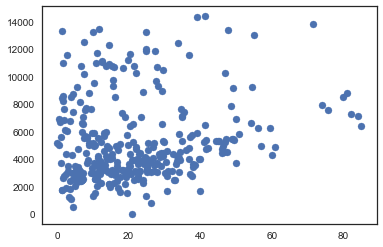

In [45]:
Bagasse_CNG = df[['Bagasse feed (t)', 'BioCNG Produced (m3)']].groupby(['Bagasse feed (t)']).mean()
Bagasse_CNG.head()

Bagasse_CNG2 = Bagasse_CNG['BioCNG Produced (m3)']
d = []
for i in Bagasse_CNG2:
    d.append(i)
#print(c)
plt.scatter(Bagasse_CNG.index, d)

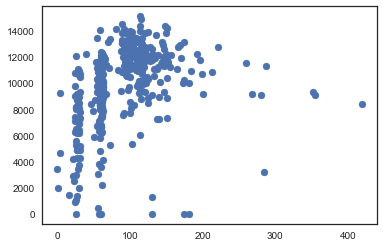

In [46]:
Fermented_CNG = df[['Municipal fecal residue (t)', 'BioCNG Produced (m3)']].groupby(['Municipal fecal residue (t)']).mean()
Fermented_CNG.head()

Fermented_CNG2 = Fermented_CNG['BioCNG Produced (m3)']
d = []
for i in Fermented_CNG2:
    d.append(i)
#print(c)
plt.scatter(Fermented_CNG.index, d)

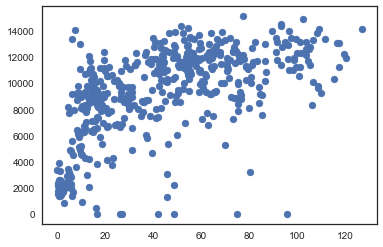

In [47]:
Fermented_CNG = df[['Kitchen food waste (t)', 'BioCNG Produced (m3)']].groupby(['Kitchen food waste (t)']).mean()
Fermented_CNG.head()

Fermented_CNG2 = Fermented_CNG['BioCNG Produced (m3)']
d = []
for i in Fermented_CNG2:
    d.append(i)
#print(c)
plt.scatter(Fermented_CNG.index, d)

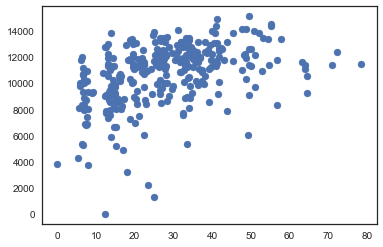

In [48]:
Fermented_CNG = df[['Chicken litter (t)', 'BioCNG Produced (m3)']].groupby(['Chicken litter (t)']).mean()
Fermented_CNG.head()

Fermented_CNG2 = Fermented_CNG['BioCNG Produced (m3)']
d = []
for i in Fermented_CNG2:
    d.append(i)
#print(c)
plt.scatter(Fermented_CNG.index, d)

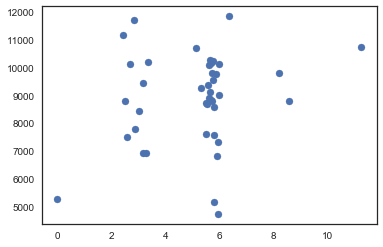

In [49]:
Fermented_CNG = df[['Chinese medicine waste (t)', 'BioCNG Produced (m3)']].groupby(['Chinese medicine waste (t)']).mean()
Fermented_CNG.head()

Fermented_CNG2 = Fermented_CNG['BioCNG Produced (m3)']
d = []
for i in Fermented_CNG2:
    d.append(i)
#print(c)
plt.scatter(Fermented_CNG.index, d)